In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Cálculo de carga para cada nodo (+/-)

In [2]:
df_prod = pd.read_csv('dataset/mean_production.csv') #el dataset de producción de sustdata 
df_ref = pd.read_csv('dataset/new_pvwatts_hourly.csv') #el dataset de producción de global
df_cons = pd.read_csv('results/consum_25.csv') #es el único que está bien, con datos y con columna h
df_cons.head()

,Pavg,iid,datetime,h
0,2524.484150,25,2013-04-06,0.0
1,300.692617,25,2013-04-06,1.0
2,232.383467,25,2013-04-06,2.0
3,220.126917,25,2013-04-06,3.0
4,217.004100,25,2013-04-06,4.0


In [3]:
df_cons['timestamp'] = pd.to_datetime(df_cons['datetime']) + pd.to_timedelta(df_cons['h'], unit='h')
df_cons.head()

,Pavg,iid,datetime,h,timestamp
0,2524.484150,25,2013-04-06,0.0,2013-04-06 00:00:00
1,300.692617,25,2013-04-06,1.0,2013-04-06 01:00:00
2,232.383467,25,2013-04-06,2.0,2013-04-06 02:00:00
3,220.126917,25,2013-04-06,3.0,2013-04-06 03:00:00
4,217.004100,25,2013-04-06,4.0,2013-04-06 04:00:00


In [4]:
df_prod = df_prod.drop('iid', axis=1)
df_prod.head()

,solar,datetime,h
0,0.0,2010-07-01,0.0
1,0.0,2010-07-01,1.0
2,0.0,2010-07-01,2.0
3,0.0,2010-07-01,3.0
4,0.0,2010-07-01,4.0


In [5]:
df_ref.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00


### Comparación de los datos de producción (Sustdata) con los de referencia (personalizados)

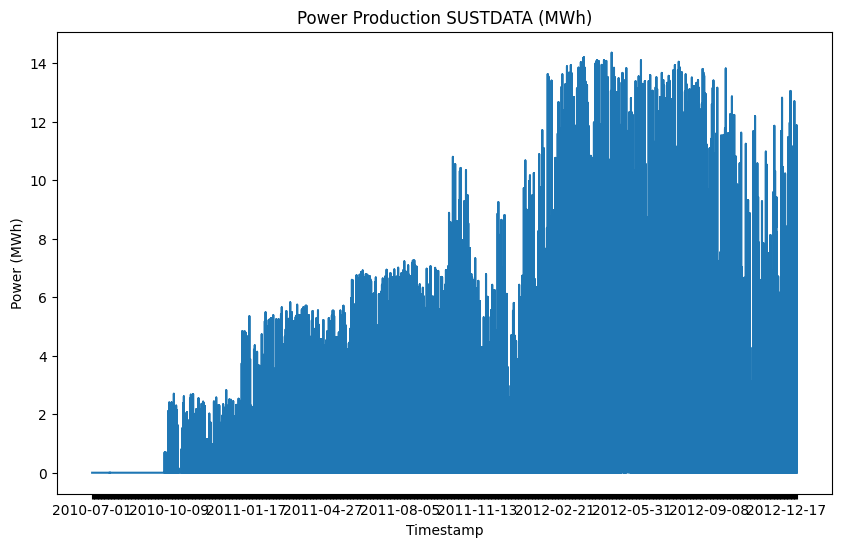

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df_prod["datetime"], df_prod["solar"], linestyle="-")
plt.title(f"Power Production SUSTDATA (MWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (MWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 100 != 0:
        label.set_visible(False)

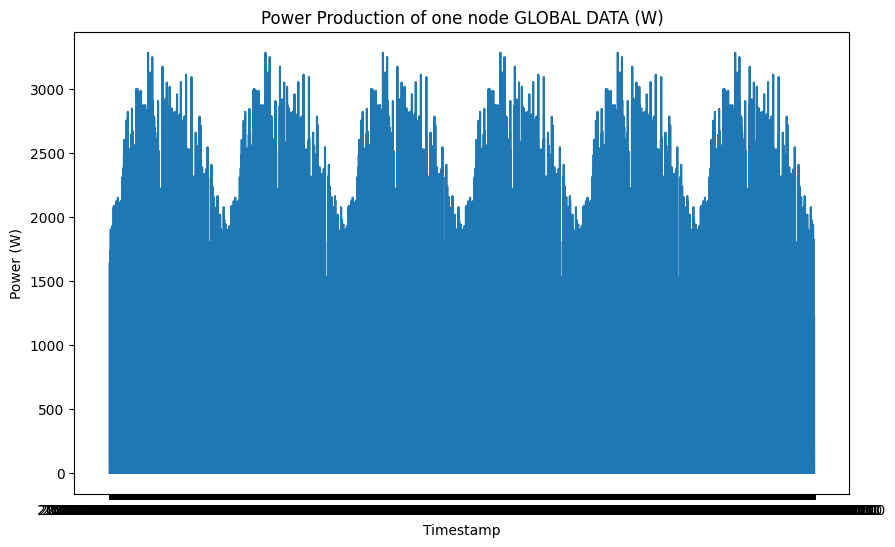

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_ref["timestamp"], df_ref["DC Array Output (W)"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 200 != 0:
        label.set_visible(False)

In [8]:
mean_all = df_prod['solar'].mean()*1e6
mean_one = df_ref['DC Array Output (W)'].mean()

print("de todos (W): " + str(mean_all) +  ", de uno (W): " + str(mean_one))
print("nº nodos media: " + str(mean_all/mean_one))

de todos (W): 1683398.6877477563, de uno (W): 530.4314433789954
nº nodos media: 3173.640455822226


### Cálculo final de producción y diferencia por nodo 

#### SUSTDATA

In [9]:
df_merged1 = pd.merge(df_prod, df_cons, on=['datetime', 'h'], how='inner')
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
0,NaN,2010-10-31,NaN,NaN,25,NaT
1,NaN,2010-10-31,NaN,NaN,25,NaT
2,NaN,2010-10-31,NaN,NaN,25,NaT
3,NaN,2010-10-31,NaN,NaN,25,NaT
4,NaN,2010-10-31,NaN,NaN,25,NaT


In [10]:
df_merged1 = df_merged1.dropna() 
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00


In [11]:
df_merged1['dif'] = (df_merged1['solar']*1000/10) - df_merged1['Pavg']  
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp,dif
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00,-164.495763
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00,-129.631658
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00,-125.548683
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00,-145.556332
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00,-149.209872


In [12]:
max_solar = df_merged1[df_merged1['dif'] < -3000]
max_solar.head()

,solar,datetime,h,Pavg,iid,timestamp,dif
613,2.7785,2012-08-21,19.0,3797.490450,25,2012-08-21 19:00:00,-3519.640450
949,0.2025,2012-09-04,20.0,3620.867833,25,2012-09-04 20:00:00,-3600.617833
1036,6.3485,2012-09-08,11.0,3969.474483,25,2012-09-08 11:00:00,-3334.624483
1037,6.4995,2012-09-08,12.0,4056.168700,25,2012-09-08 12:00:00,-3406.218700
1117,0.0865,2012-09-11,20.0,3282.501117,25,2012-09-11 20:00:00,-3273.851117


#### GLOBAL DATA

In [13]:
df_ref['timestamp'] = pd.to_datetime(df_ref['timestamp'])
df_merged2 = pd.merge(df_ref, df_cons, on=['timestamp'], how='inner')
df_merged2.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h
0,8,1,0,0,0,19.2,0.8,0.2,0.0,19.2,0.0,0.0,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0
1,8,1,1,0,0,19.1,0.3,0.2,0.0,19.1,0.0,0.0,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0
2,8,1,2,0,0,19.0,0.3,0.2,0.0,19.0,0.0,0.0,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0
3,8,1,3,0,0,18.9,0.1,0.2,0.0,18.9,0.0,0.0,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0
4,8,1,4,0,0,18.8,0.2,0.2,0.0,18.8,0.0,0.0,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0


In [14]:
df_merged2['dif'] = (df_merged2['DC Array Output (W)']) - df_merged2['Pavg']  
df_merged2.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h,dif
0,8,1,0,0,0,19.2,0.8,0.2,0.0,19.2,0.0,0.0,2012-08-01 00:00:00,164.495763,25,2012-08-01,0.0,-164.495763
1,8,1,1,0,0,19.1,0.3,0.2,0.0,19.1,0.0,0.0,2012-08-01 01:00:00,129.631658,25,2012-08-01,1.0,-129.631658
2,8,1,2,0,0,19.0,0.3,0.2,0.0,19.0,0.0,0.0,2012-08-01 02:00:00,125.548683,25,2012-08-01,2.0,-125.548683
3,8,1,3,0,0,18.9,0.1,0.2,0.0,18.9,0.0,0.0,2012-08-01 03:00:00,145.556332,25,2012-08-01,3.0,-145.556332
4,8,1,4,0,0,18.8,0.2,0.2,0.0,18.8,0.0,0.0,2012-08-01 04:00:00,149.209872,25,2012-08-01,4.0,-149.209872


In [15]:
max_solar = df_merged2[df_merged2['dif'] < -3000]
max_solar.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp,Pavg,iid,datetime,h,dif
86,8,4,14,16,149,24.4,0.0,0.2,157.822,30.796,493.245,459.913,2012-08-04 14:00:00,3528.191917,25,2012-08-04,14.0,-3034.946917
115,8,5,19,0,0,22.9,0.0,0.2,0.000,0.000,0.000,0.000,2012-08-05 19:00:00,3330.805783,25,2012-08-05,19.0,-3330.805783
208,8,12,15,66,191,23.1,4.9,0.2,242.909,26.805,791.263,747.372,2012-08-12 15:00:00,3958.356000,25,2012-08-12,15.0,-3167.093000
421,8,21,19,0,0,20.5,0.0,0.2,0.000,0.000,0.000,0.000,2012-08-21 19:00:00,3797.490450,25,2012-08-21,19.0,-3797.490450
757,9,4,20,0,0,22.1,0.0,0.2,0.000,22.100,0.000,0.000,2012-09-04 20:00:00,3620.867833,25,2012-09-04,20.0,-3620.867833


#### COMPARACIÓN RESULTADOS

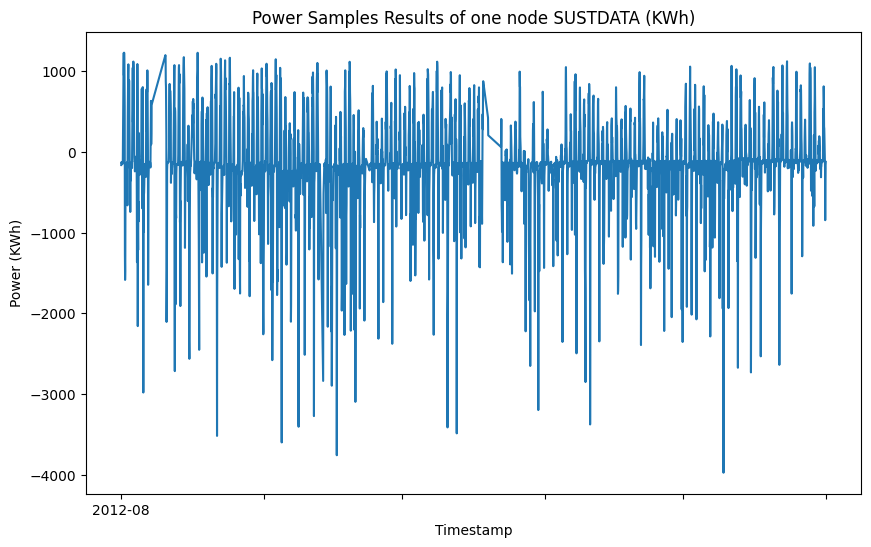

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged1["timestamp"], df_merged1["dif"], linestyle="-")
plt.title(f"Power Samples Results of one node SUSTDATA (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (KWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 20 != 0:
        label.set_visible(False)

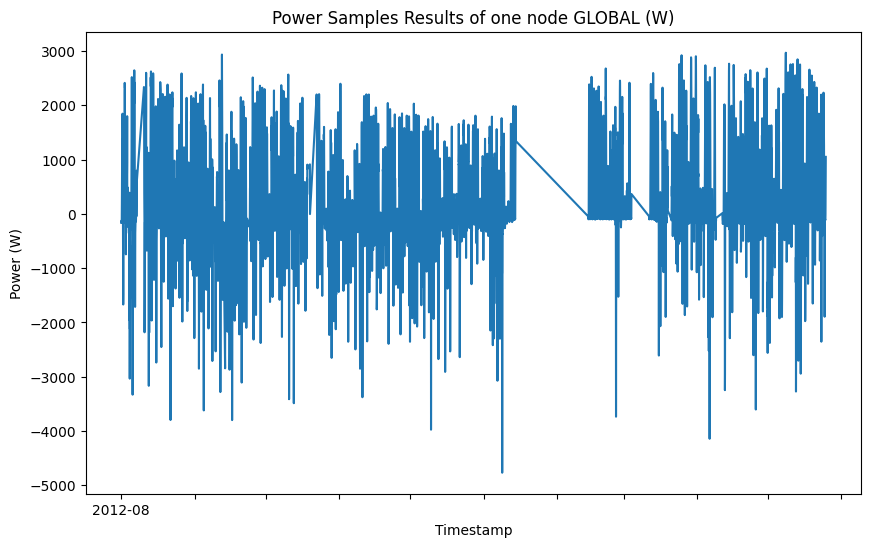

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged2["timestamp"], df_merged2["dif"], linestyle="-")
plt.title(f"Power Samples Results of one node GLOBAL (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 30 != 0:
        label.set_visible(False)